# Introduction

It is a USA Health Insurance Project, By this dataset we can know health insurance price in USA based on some parameter like
age,bmi,gender,smoking status etc.A Insurance Company using this data to perform EDA and get valuable insights and also applying
some mechine learning algorithms for predicting the health insurance price and create a model. If any new customer is coming 
company predict insurance price bassed on this model.


In [1]:
# Importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# read the dataset
health_raw=pd.read_excel('Health_insurance_cost.xlsx')
# creating a new copy
health= health_raw.copy()    

In [3]:
# see first 5 rows in the dataset
health.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [4]:
# see last 5 rows in the dataset
health.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [5]:
health.shape

(1338, 7)

In this datset 1338 observations and 7 variables

In [6]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [7]:
# see all the statistical values
health.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# see all the columns
health.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [9]:
# drop if any duplicates value have this dataset
health.drop_duplicates(inplace=True)

In [10]:
health.shape

(1337, 7)

In [66]:
# checking null values
health.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

see here 2 columns have null values and also 1 target variable have null values

In [67]:
# checking null values in percentage wise
health.isnull().mean()*100

age                       2.094241
gender                    0.000000
BMI                       1.720269
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149589
dtype: float64

here 2% in age column and 1.7% in BMI column have null values and in health_insurance_price has only 0.14% null value and
it is also target variable so we can drop the rows from this column

In [68]:
import missingno as msno

<Axes: >

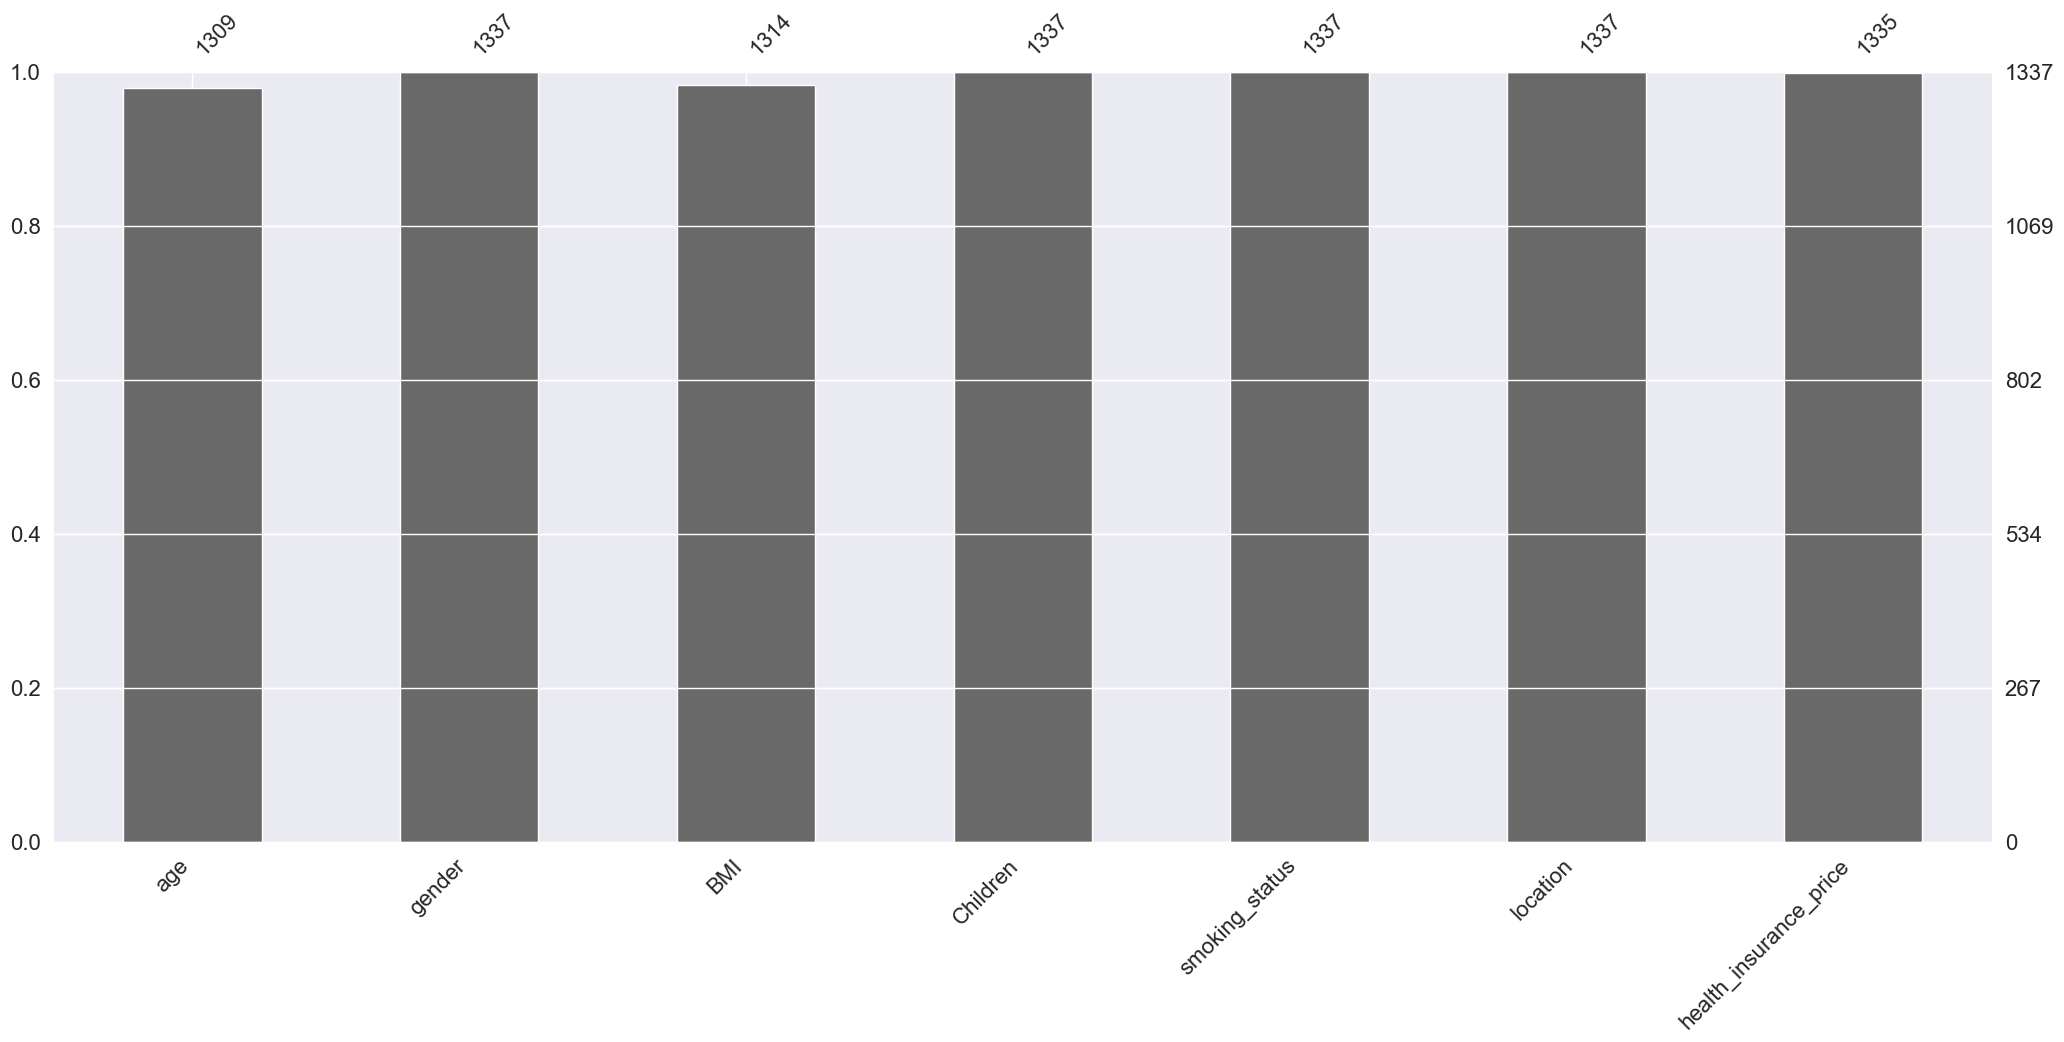

In [69]:
msno.bar(health)

<Axes: >

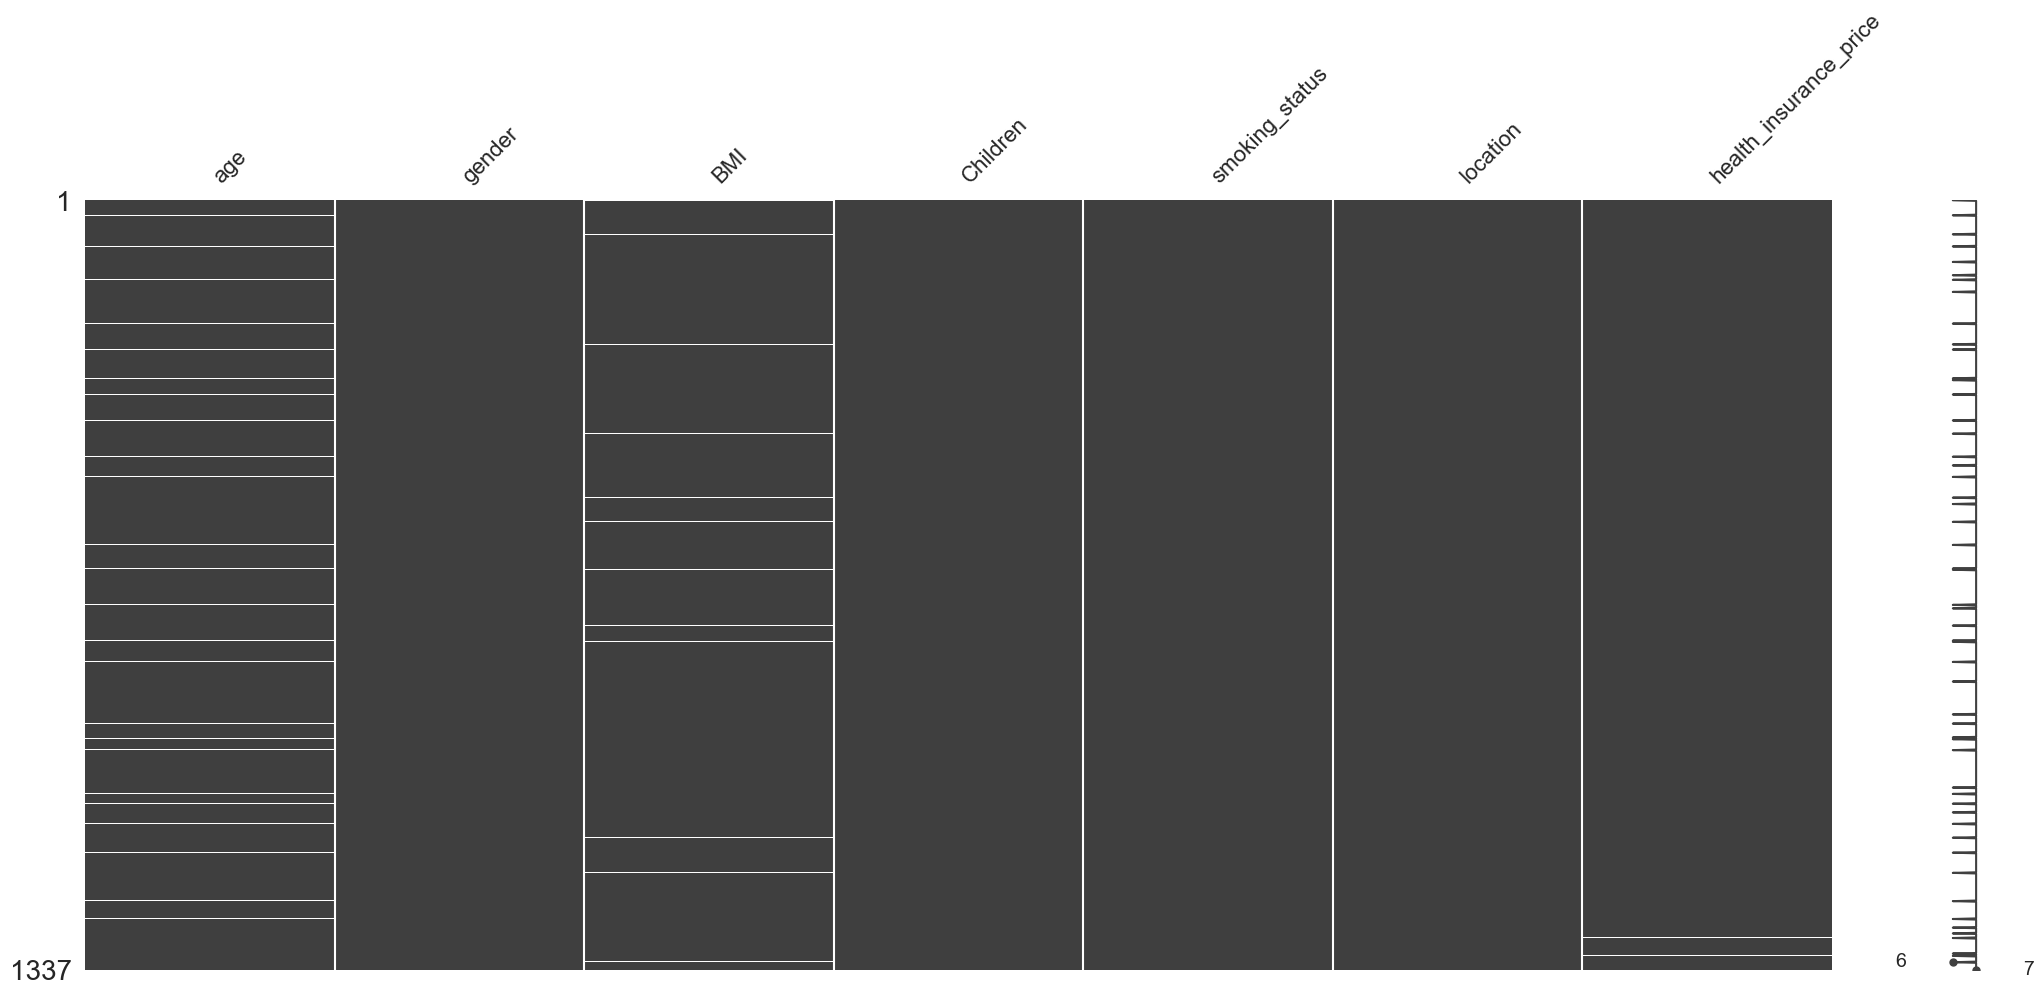

In [70]:
msno.matrix(health)

In [71]:
# Dropping the null values from target variable
health.drop(health[health['health_insurance_price'].isnull()].index,axis=0, inplace=True)

In [72]:
health.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64

In [73]:
health.shape

(1335, 7)

# Before dealing with missing values we have to encoded all catagorical values to numerical values

In [74]:
#Converting males to 0 and females to 1
health['gender'] =health.gender.map({'male': 0, 'female':1})

# converting smoking_status to no=0 and yes=1
health['smoking_status'] = health.smoking_status.map({'no': 0, 'yes':1})

# converting lication to southwest = 0, southeast=1,northwest=2, northeast=3
health['location'] = health['location'].map({'southwest': 0, 'southeast':1, 'northwest':2, 'northeast':3})

In [75]:
health.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,1,NaN,0,1,0,16884.92400
1,18.0,0,33.770,1,0,1,1725.55230
2,28.0,0,33.000,3,0,1,4449.46200
3,33.0,0,22.705,0,0,2,21984.47061
4,32.0,0,28.880,0,0,2,3866.85520


In [76]:
# To avoid data leakage from outcom variable splitting the data set
health1 = health.drop('health_insurance_price',axis=1)
health1.head()

,age,gender,BMI,Children,smoking_status,location
0,19.0,1,NaN,0,1,0
1,18.0,0,33.770,1,0,1
2,28.0,0,33.000,3,0,1
3,33.0,0,22.705,0,0,2
4,32.0,0,28.880,0,0,2


In [11]:
# creating y variable only
health2=health['health_insurance_price']
health2.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

In [78]:
from fancyimpute import KNN
knn_imputer = KNN()
health1_knn = health1.copy(deep=True)
health1_knn.iloc[:, :] = knn_imputer.fit_transform(health1_knn)

Imputing row 1/1335 with 1 missing, elapsed time: 0.160
Imputing row 101/1335 with 0 missing, elapsed time: 0.160
Imputing row 201/1335 with 0 missing, elapsed time: 0.160
Imputing row 301/1335 with 0 missing, elapsed time: 0.160
Imputing row 401/1335 with 0 missing, elapsed time: 0.160
Imputing row 501/1335 with 0 missing, elapsed time: 0.160
Imputing row 601/1335 with 0 missing, elapsed time: 0.160
Imputing row 701/1335 with 0 missing, elapsed time: 0.160
Imputing row 801/1335 with 0 missing, elapsed time: 0.160
Imputing row 901/1335 with 0 missing, elapsed time: 0.160
Imputing row 1001/1335 with 0 missing, elapsed time: 0.160
Imputing row 1101/1335 with 0 missing, elapsed time: 0.160
Imputing row 1201/1335 with 0 missing, elapsed time: 0.160
Imputing row 1301/1335 with 0 missing, elapsed time: 0.160


C:\Users\SAIKAT\AppData\Local\Temp\ipykernel_23268\1804907529.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  health1_knn.iloc[:, :] = knn_imputer.fit_transform(health1_knn)


In [79]:
# Imputation using MICE
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
health1_MICE = health1.copy(deep=True)
health1_MICE.iloc[:, :] = MICE_imputer.fit_transform(health1_MICE)

C:\Users\SAIKAT\AppData\Local\Temp\ipykernel_23268\864030525.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  health1_MICE.iloc[:, :] = MICE_imputer.fit_transform(health1_MICE)


In [80]:
health1_MICE.head()

,age,gender,BMI,Children,smoking_status,location
0,19.0,1.0,30.601433,0.0,1.0,0.0
1,18.0,0.0,33.770000,1.0,0.0,1.0
2,28.0,0.0,33.000000,3.0,0.0,1.0
3,33.0,0.0,22.705000,0.0,0.0,2.0
4,32.0,0.0,28.880000,0.0,0.0,2.0


<Axes: xlabel='BMI', ylabel='Count'>

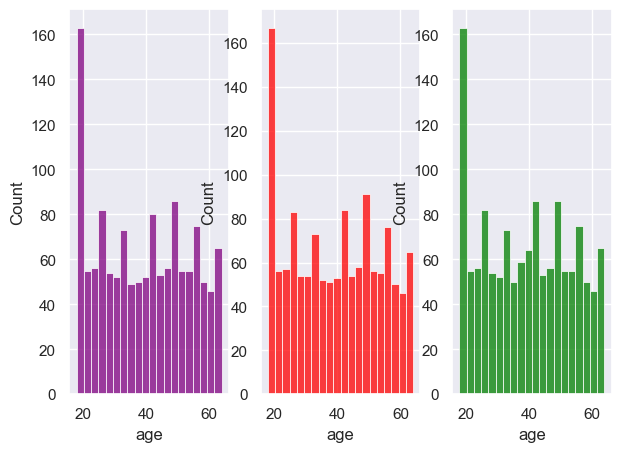

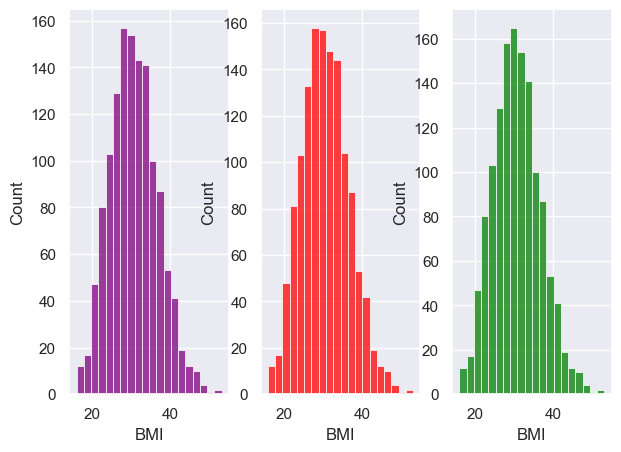

In [81]:
fig, ax =plt.subplots(1,3)
sns.histplot(health['age'],bins=20, color="purple", ax=ax[0])
sns.histplot(health1_knn['age'], color="red", bins=20, ax=ax[1])
sns.histplot(health1_MICE['age'], color="green", bins=20, ax=ax[2])

fig, ax =plt.subplots(1,3)
sns.histplot(health['BMI'],bins=20, color="purple", ax=ax[0])
sns.histplot(health1_knn['BMI'], color="red", bins=20, ax=ax[1])
sns.histplot(health1_MICE['BMI'], color="green", bins=20, ax=ax[2])

<Axes: >

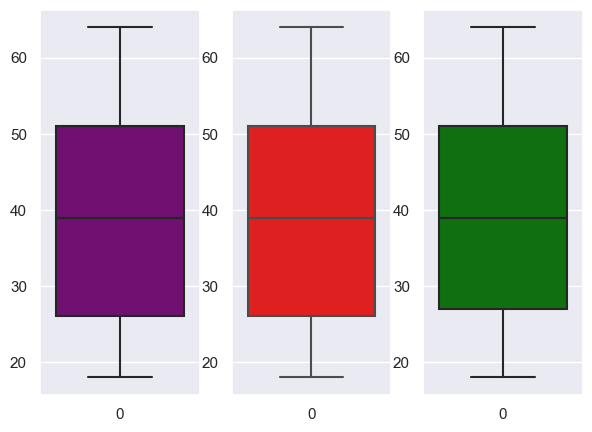

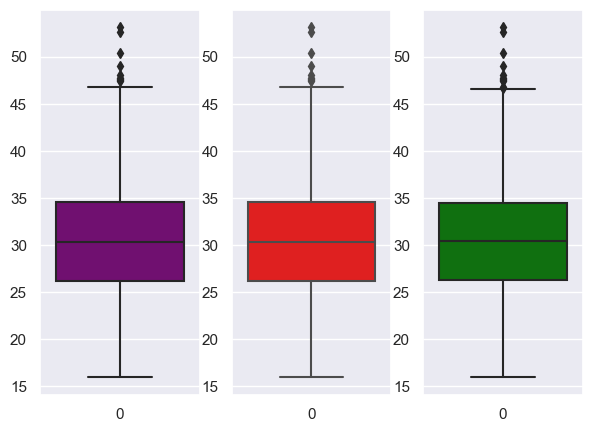

In [82]:
fig, ax =plt.subplots(1,3)
sns.boxplot(health['age'], color="purple", ax=ax[0])
sns.boxplot(health1_knn['age'], color="red", ax=ax[1])
sns.boxplot(health1_MICE['age'], color="green", ax=ax[2])

fig, ax =plt.subplots(1,3)
sns.boxplot(health['BMI'], color="purple", ax=ax[0])
sns.boxplot(health1_knn['BMI'], color="red", ax=ax[1])
sns.boxplot(health1_MICE['BMI'], color="green", ax=ax[2])

In [83]:
health1_knn.describe() # using describe function to see if there is any discrepency in numerical measures

,age,gender,BMI,Children,smoking_status,location
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.148449,0.495131,30.633335,1.095131,0.204494,1.484644
std,14.005110,0.500164,6.084193,1.206218,0.403483,1.105199
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,26.010010,0.000000,26.199995,0.000000,0.000000,1.000000
50%,39.000000,0.000000,30.360000,1.000000,0.000000,1.000000
75%,51.000000,1.000000,34.540000,2.000000,0.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


In [84]:
health1_knn.describe() # using describe function to see if there is any discrepency in numerical measure

,age,gender,BMI,Children,smoking_status,location
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.148449,0.495131,30.633335,1.095131,0.204494,1.484644
std,14.005110,0.500164,6.084193,1.206218,0.403483,1.105199
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,26.010010,0.000000,26.199995,0.000000,0.000000,1.000000
50%,39.000000,0.000000,30.360000,1.000000,0.000000,1.000000
75%,51.000000,1.000000,34.540000,2.000000,0.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


In [85]:
health.describe()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1307.000000,1335.000000,1312.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.179801,0.495131,30.631189,1.095131,0.204494,1.484644,13277.238554
std,14.058038,0.500164,6.107345,1.206218,0.403483,1.105199,12113.150034
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.195000,0.000000,0.000000,1.000000,4746.698450
50%,39.000000,0.000000,30.305000,1.000000,0.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.580000,2.000000,0.000000,2.000000,16622.107580
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


see here fill the missing values KNN and MICE both performed well so we go any of them i will go with knn

In [86]:
# concat every column
health_missing=pd.concat([health1_knn,health2],axis=1)

In [87]:
health_missing.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [88]:
### Getting independent features

independent_features=[feature for feature in health.columns if feature not in ['health_insurance_price']]
print(independent_features)

['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location']


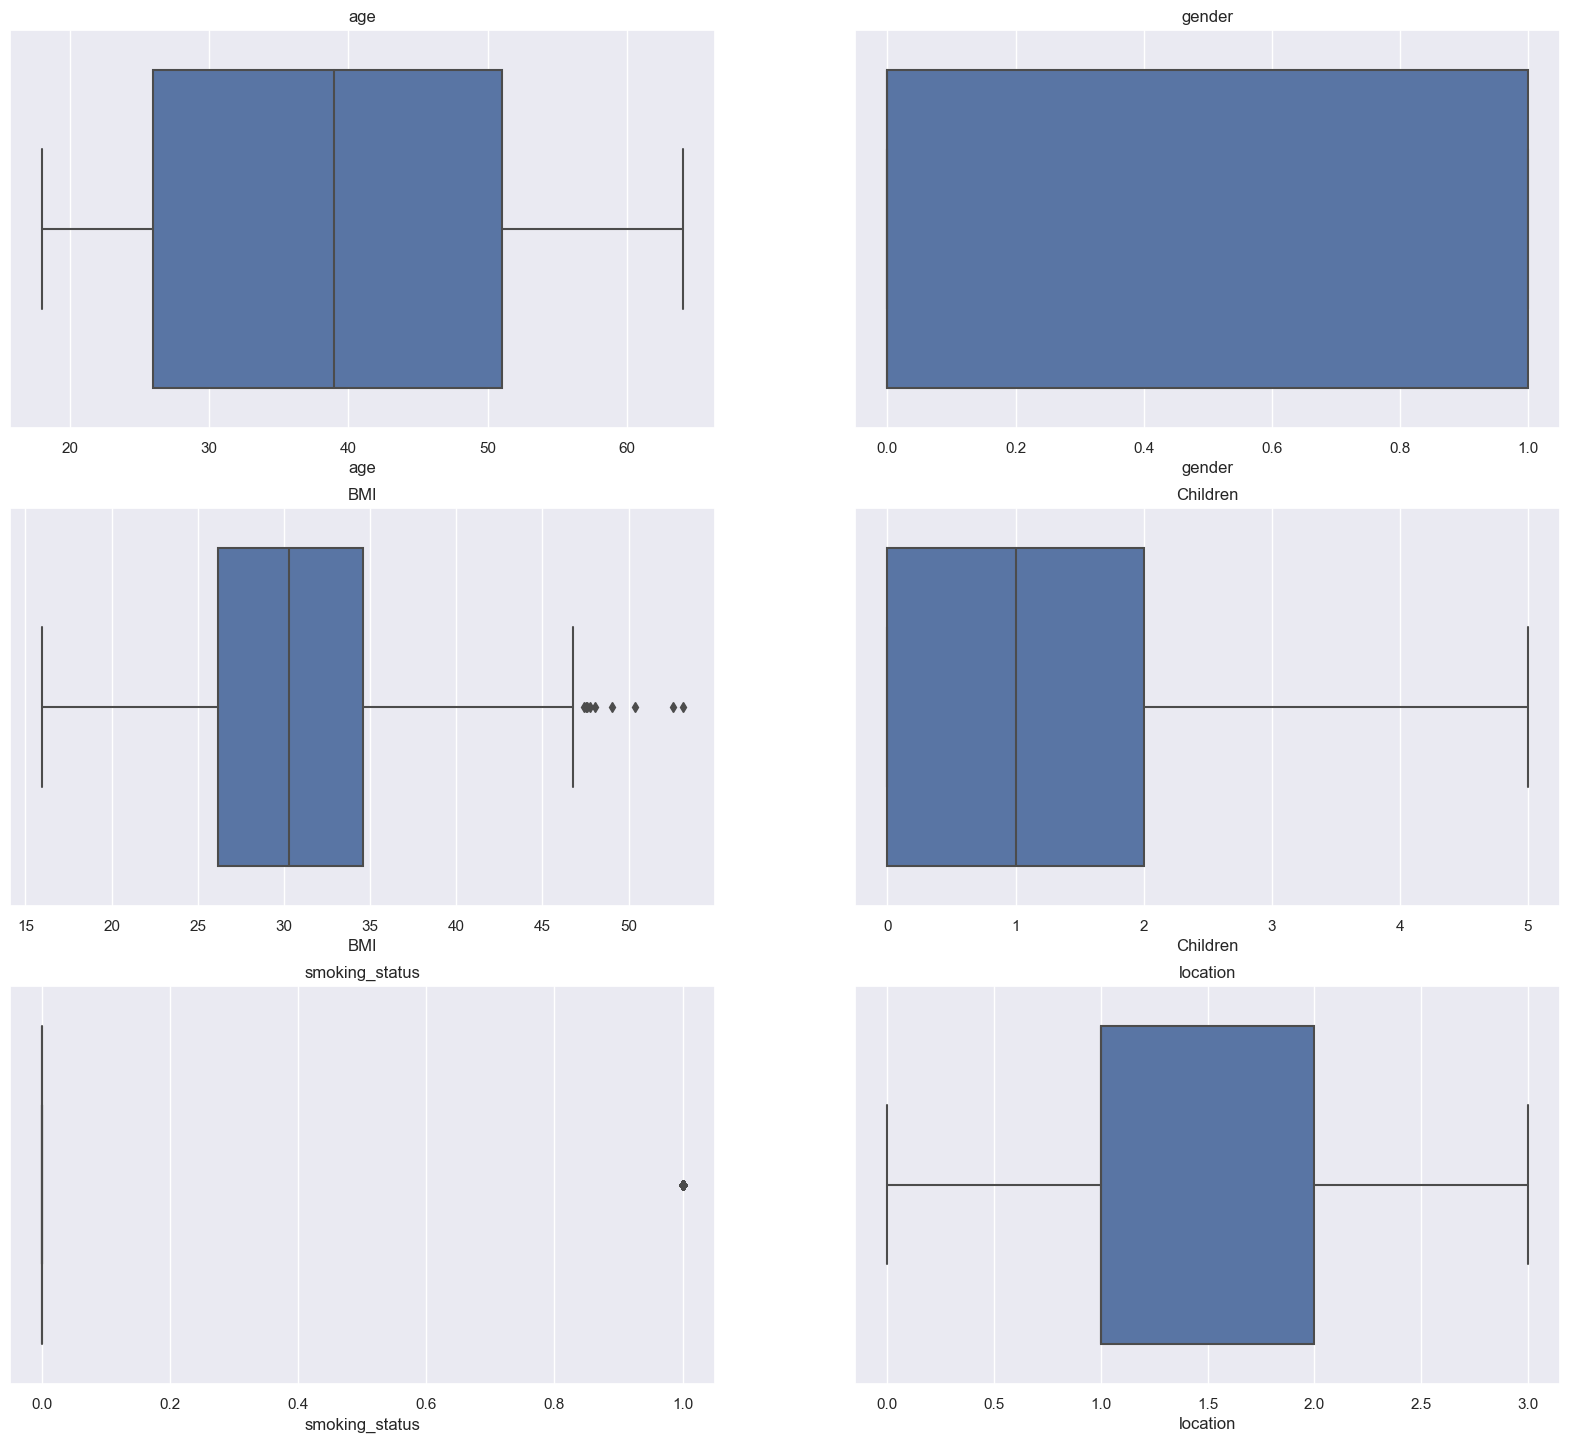

In [89]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.boxplot(data=health, x=i[1])
  plt.title("{}".format(i[1]))

# Handling Outliers

In [90]:
# Here I am using IQR to remove outliers. I have already checked Z score and did not work well
# IQR for price column
Q1 = health_missing['BMI'].quantile(0.25)
Q3 = health_missing['BMI'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

34.54 26.19999475000656
8.340005249993439
47.05000787499016
13.689986875016402


In [91]:
health_missing_out = health_missing[health_missing.BMI < upper_bound]
health_missing_out = health_missing[health_missing.BMI > lower_bound]
health_missing_out.shape

(1335, 7)

<Axes: xlabel='BMI', ylabel='Count'>

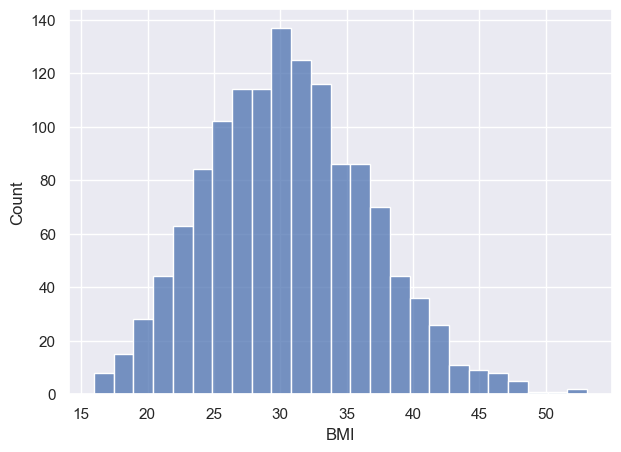

In [92]:
sns.histplot(health_missing_out['BMI']) # examining distribution of area column 

In [93]:
health=health_missing_out

In [94]:
health

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,1.0,26.19999,0.0,1.0,0.0,16884.92400
1,18.0,0.0,33.77000,1.0,0.0,1.0,1725.55230
2,28.0,0.0,33.00000,3.0,0.0,1.0,4449.46200
3,33.0,0.0,22.70500,0.0,0.0,2.0,21984.47061
4,32.0,0.0,28.88000,0.0,0.0,2.0,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,0.0,30.97000,3.0,0.0,2.0,10600.54830
1334,18.0,1.0,31.92000,0.0,0.0,3.0,2205.98080
1335,18.0,1.0,36.85000,0.0,0.0,1.0,1629.83350
1336,21.0,1.0,25.80000,0.0,0.0,0.0,2007.94500


In [39]:
#Converting males to 0 and females to 1
health['gender'] =health.gender.map({0: 'male', 1: 'female'})

# converting smoking_status to no=0 and yes=1
health['smoking_status'] = health.smoking_status.map({0: 'no', 1:'yes'})

# converting lication to southwest = 0, southeast=1,northwest=2, northeast=3
health['location'] = health['location'].map({0: 'southwest', 1:'southeast', 2:'northwest', 3:'northeast'})

In [40]:
health

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,26.19999,0.0,yes,southwest,16884.92400
1,18.0,male,33.77000,1.0,no,southeast,1725.55230
2,28.0,male,33.00000,3.0,no,southeast,4449.46200
3,33.0,male,22.70500,0.0,no,northwest,21984.47061
4,32.0,male,28.88000,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.97000,3.0,no,northwest,10600.54830
1334,18.0,female,31.92000,0.0,no,northeast,2205.98080
1335,18.0,female,36.85000,0.0,no,southeast,1629.83350
1336,21.0,female,25.80000,0.0,no,southwest,2007.94500


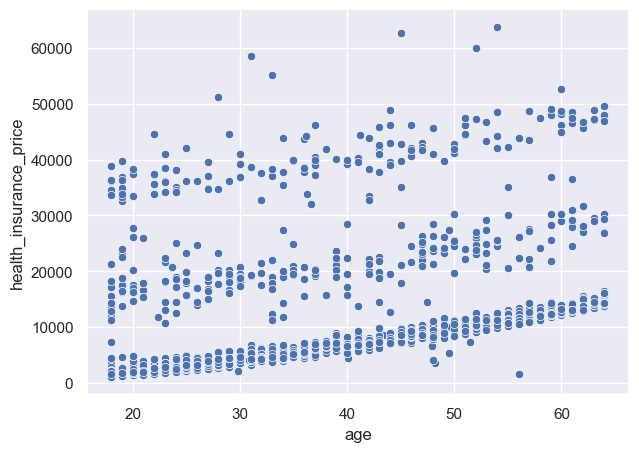

In [95]:
sns.set()
sns.scatterplot(x='age',y='health_insurance_price',data=health)
plt.show()

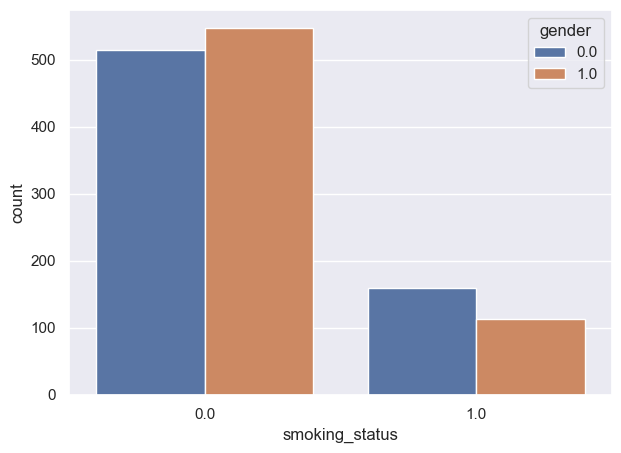

In [96]:
sns.countplot(x='smoking_status',data=health,hue='gender')
plt.show()

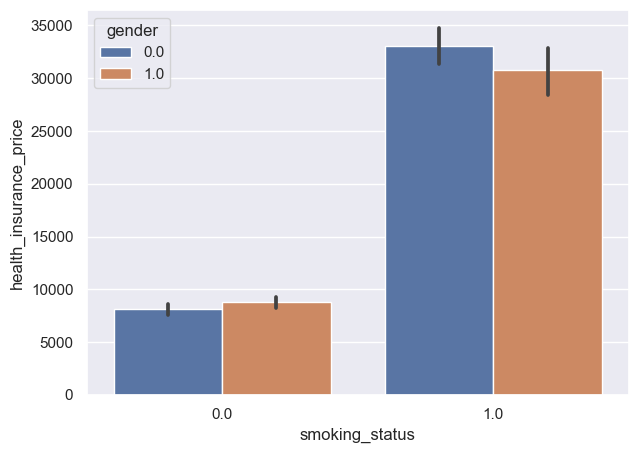

In [97]:
sns.barplot(x='smoking_status',y='health_insurance_price',data=health,hue='gender')
plt.show()

In [98]:
health['health_insurance_price'].groupby(health['smoking_status']).mean()

smoking_status
0.0     8444.336767
1.0    32077.757594
Name: health_insurance_price, dtype: float64

<Axes: xlabel='Children', ylabel='count'>

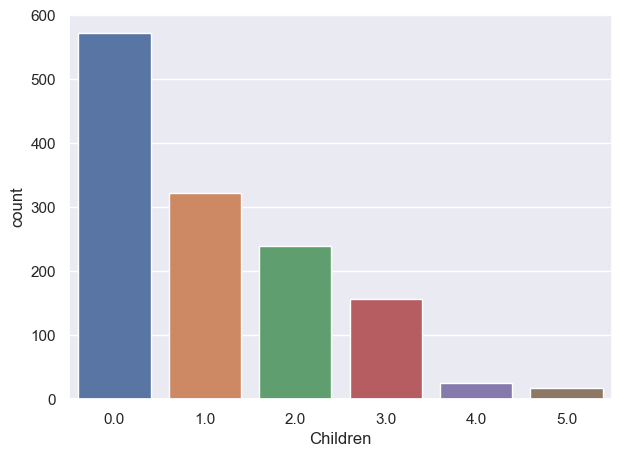

In [99]:
# Number of Children
sns.countplot(x='Children',data=health)

<Axes: >

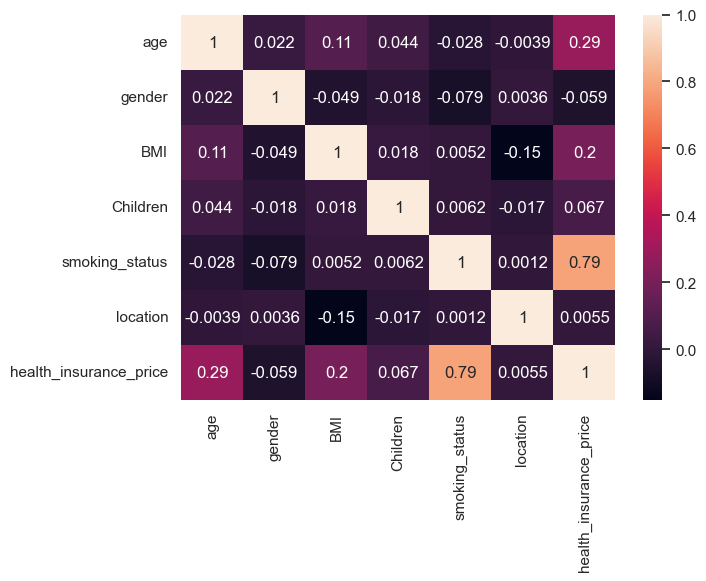

In [100]:
cor=health.corr()
sns.heatmap(cor,annot=True)

C:\Users\SAIKAT\AppData\Local\Temp\ipykernel_23268\1762366150.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = health.corr()


<Axes: >

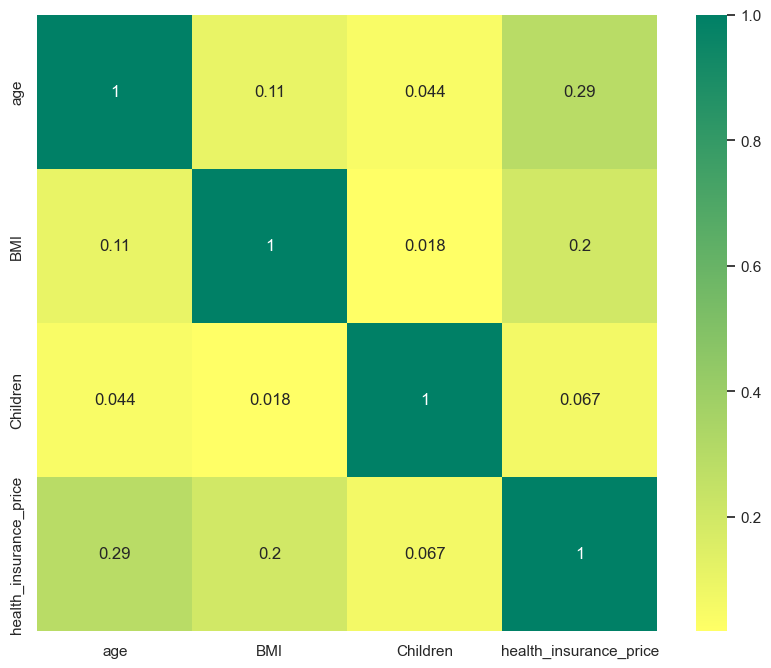

In [56]:
corr = health.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

In [101]:
X = health_missing_out.drop('health_insurance_price',axis=1)
X.head()

,age,gender,BMI,Children,smoking_status,location
0,19.0,1.0,26.19999,0.0,1.0,0.0
1,18.0,0.0,33.77000,1.0,0.0,1.0
2,28.0,0.0,33.00000,3.0,0.0,1.0
3,33.0,0.0,22.70500,0.0,0.0,2.0
4,32.0,0.0,28.88000,0.0,0.0,2.0


In [102]:
X.isnull().sum()

age               0
gender            0
BMI               0
Children          0
smoking_status    0
location          0
dtype: int64

In [103]:
y=health_missing_out['health_insurance_price']

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [106]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.66168796,  0.99439772, -0.45246482, -0.90404786, -0.51371716,
        -1.35711931],
       [ 1.62840003,  0.99439772,  1.43384332, -0.90404786, -0.51371716,
        -0.4489718 ],
       [ 0.91274753,  0.99439772,  0.12363278, -0.90404786, -0.51371716,
        -1.35711931],
       ...,
       [ 1.27057378, -1.00563385,  0.58615685, -0.90404786, -0.51371716,
         0.45917571],
       [-1.52047095,  0.99439772,  1.43384332, -0.90404786, -0.51371716,
        -0.4489718 ],
       [ 0.84118228, -1.00563385, -0.83104324, -0.90404786, -0.51371716,
        -1.35711931]])

In [107]:
X_test=sc.transform(X_test)
X_test

array([[-0.08916596, -1.00563385, -1.7281095 , -0.07881443, -0.51371716,
         0.45917571],
       [ 0.98431278,  0.99439772, -0.38662509,  1.57165243, -0.51371716,
        -1.35711931],
       [-0.23229646, -1.00563385,  1.79016782,  1.57165243, -0.51371716,
         0.45917571],
       ...,
       [-0.94794895, -1.00563385,  2.64694026, -0.07881443, -0.51371716,
        -0.4489718 ],
       [ 0.41179079,  0.99439772,  0.43635809, -0.90404786, -0.51371716,
        -1.35711931],
       [-1.52047095,  0.99439772,  0.11211083, -0.90404786, -0.51371716,
        -0.4489718 ]])

In [59]:
# fitting linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
 #regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [ 3.46167942e+03 -9.09347836e+00  2.09705065e+03  5.94119844e+02
  9.54800669e+03  2.51849323e+02]


In [61]:
# fitting model into test data
y_pred = lm.predict(X_train)

In [62]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
# calculting rsquared value
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.7441423600902939


In [64]:
# calculting adjusted rsquared value
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7431797655082408


In [65]:
# Checking mean value for residuala
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.7440497651975253e-12


C:\Users\SAIKAT\AppData\Local\Temp\ipykernel_5608\1894568083.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred),bins=50)


<Axes: xlabel='health_insurance_price', ylabel='Density'>

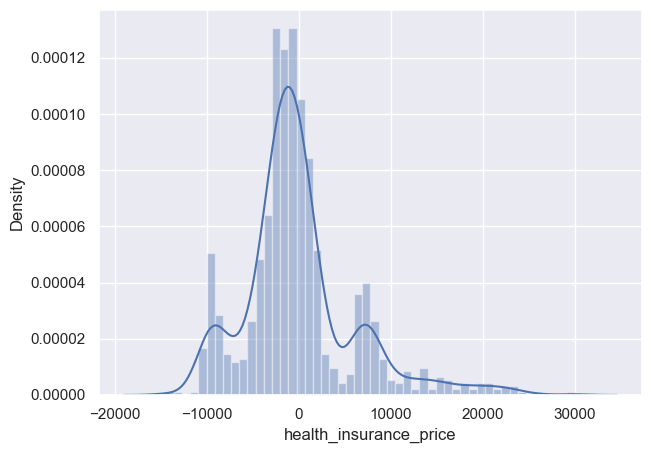

In [66]:
#checking if errors are normally distributed are not
sns.distplot((y_train-y_pred),bins=50)

In [67]:
predictions = lm.predict(X_test) # predicting test set

In [68]:
y_test.head()

1082     5855.90250
72      11741.72600
1063     6548.19505
670      4837.58230
579      3206.49135
Name: health_insurance_price, dtype: float64

In [69]:
predictions

array([ 4484.16303127, 11518.31825172, 12347.27198117,  7265.04559952,
        2197.12063988, 13224.88781353,  6906.74651383,  4705.80382783,
       12575.19485714, 11024.53711785,  4459.6433895 , 15196.34959262,
       13736.70723873, 11684.01054331, 12732.8167508 , 15019.96248539,
       13720.38086443, 12147.82713933, 13977.24456099, 31605.89602842,
       12191.55050771, 24459.69140763,  5942.971643  ,  5827.98312694,
       29866.05545838,  4571.67613996, 12553.63480293,  2944.55540192,
       10615.33934874,  1941.44362738,  3723.51967037,  8588.20145539,
       11433.08232436,  4685.44335311, 11186.01109875,  2179.62656787,
        3847.68822331,  9824.17876526, 28827.7707519 , 33223.70628059,
        6280.14306783,  2792.40872495, 39556.62955575, 29526.82838205,
       24562.49290157, 11245.5032513 ,  6068.5186033 , 11064.256577  ,
        8479.10287725, 11056.58663598,  9745.19262507, 33532.27437983,
       17517.59546275, 37002.91723828,  4248.45756384, 28116.76891318,
      

In [70]:
# Calculating error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4402.948825325743
MSE: 38232378.78472396
RMSE: 6183.23368349636


# Random Forest

In [71]:
# Importing library
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [72]:
# performing prediction
y_pred8 = regressor.predict(X_test)
y_pred8

array([ 6269.8320363 , 12220.3416746 , 11378.0032354 ,  5323.7297721 ,
        8465.9899665 , 14426.9980937 ,  7789.1128145 ,  3865.9046637 ,
       12125.99551   , 16784.3515748 ,  3784.2825201 , 13625.321021  ,
       10195.889519  ,  7498.2702429 , 10909.5645008 , 11069.9156661 ,
       13271.8401387 , 10494.2226752 , 10537.6360374 , 37389.1602955 ,
       12185.9367055 , 16876.8974303 ,  7763.7643787 ,  8385.094919  ,
       24760.6264471 ,  5066.9288107 , 12426.0553684 , 11391.472835  ,
        8513.8331305 ,  5372.4565134 , 10190.7977795 ,  6607.3431839 ,
       15771.6875339 ,  2034.5807825 ,  9210.3134336 ,  2336.7935652 ,
        5284.40839151, 13204.692899  , 37655.2166257 , 26060.2355492 ,
        1921.6204325 ,  9524.0898471 , 47461.2344707 , 21138.8403922 ,
       18214.0651823 , 11839.5681207 , 10229.8446544 ,  8006.3769599 ,
        7844.1221274 , 11492.2651302 ,  8863.4561231 , 42198.1363582 ,
       16524.0051173 , 48539.2754836 ,  8605.4381693 , 36930.1235468 ,
      

In [82]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred8))
print('MSE:', metrics.mean_squared_error(y_test, y_pred8))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred8)))

MAE: 3105.930675240494
MSE: 27042577.951823108
RMSE: 5200.247874075149


In [75]:
r2 =r2_score(y_test,y_pred8)
print(r2)

0.8196371379153654


# SVM

In [100]:
# Importing SVR library and creating model
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [101]:
y_pred1 = svm.predict(X_test) # prediciting y

In [102]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 8402.238557744651
MSE: 166234507.65572584
RMSE: 12893.196176888252


In [104]:
r22 = metrics.r2_score(y_test,y_pred1)
print(r22)

-0.10871573085344477


In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [87]:
y_pred3=gr.predict(X_test)

In [88]:
r2 =r2_score(y_test,y_pred3)
print(r2)

0.8466639659483013


In [89]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 2664.055263401666
MSE: 22990329.637376722
RMSE: 4794.823212317293


In [90]:
from xgboost import XGBRegressor

In [91]:
model=XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [92]:
y_pred0=model.predict(X_test)

In [93]:
r2 =r2_score(y_test,y_pred0)
print(r2)

0.817299762725402


In [94]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred0))
print('MSE:', metrics.mean_squared_error(y_test, y_pred0))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred0)))

MAE: 3201.040396511569
MSE: 27393030.645058725
RMSE: 5233.835175572376
